In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clustered_df.csv")
print(df.head())

   Corporation ID                         Corp Name  Non-GCE Promote %  \
0              15   Adams Central Community Schools           0.017691   
1              25     North Adams Community Schools           0.042012   
2              35               South Adams Schools           0.004467   
3             125  MSD Southwest Allen County Schls           0.024144   
4             225    Northwest Allen County Schools           0.012208   

      ELL %  Special Education %    FRPM_%  Pct American Indian  Pct Asian  \
0  0.023529             0.152941  0.271324             0.000735   0.005147   
1  0.007600             0.179861  0.454718             0.002533   0.005066   
2  0.100153             0.188838  0.455657             0.001529   0.008410   
3  0.020649             0.119391  0.236400             0.002250   0.046195   
4  0.036025             0.157700  0.237743             0.001193   0.062865   

   Pct Black  Pct Hispanic  ...  Chronically Absent Percent  AVG_ATT_RATE  \
0   0.005

In [6]:
df['Cluster'].value_counts().sort_index()

Cluster
A     22
B     18
C     26
D    105
E      5
F    102
G     28
Name: count, dtype: int64

In [7]:
cluster_profiles = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_profiles.T)

Cluster                                A             B             C  \
Corporation ID               6420.909091   4858.611111   4031.730769   
Non-GCE Promote %               0.068839      0.032917      0.020484   
ELL %                           0.044996      0.104358      0.074984   
Special Education %             0.278696      0.173127      0.148466   
FRPM_%                          0.637081      0.506108      0.339587   
Pct American Indian             0.001432      0.001158      0.001802   
Pct Asian                       0.010089      0.009082      0.084702   
Pct Black                       0.187169      0.060107      0.084040   
Pct Hispanic                    0.118213      0.237143      0.107325   
Pct Multiracial                 0.112960      0.033791      0.058627   
Pct Pacific Islander            0.000857      0.000461      0.001293   
Pct White                       0.569240      0.658222      0.662191   
Chronically Absent Percent      0.221399      0.108083      0.08

In [5]:
df.groupby(['Cluster', 'sub_cluster']).size().unstack(fill_value=0)

sub_cluster,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
A,21,1,0,0,0,0,0,0,0,0
B,1,4,3,1,3,4,2,0,0,0
C,19,1,6,0,0,0,0,0,0,0
D,5,24,15,19,2,10,2,1,26,1
E,5,0,0,0,0,0,0,0,0,0
F,9,12,10,23,12,34,1,1,0,0
G,1,4,12,10,1,0,0,0,0,0


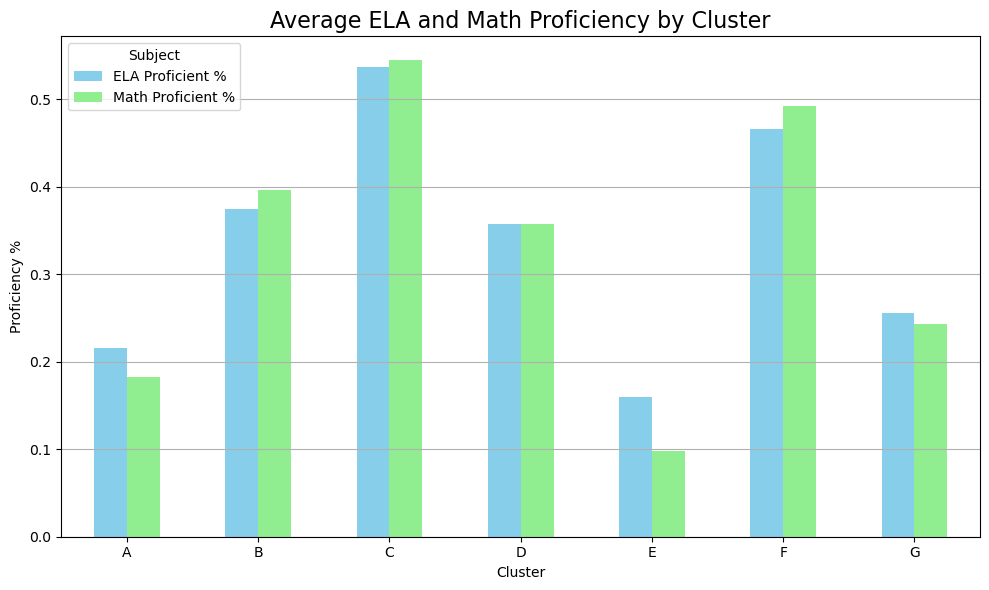

In [34]:
cluster_means = df.groupby('Cluster')[['ELA Proficient %', 'Math Proficient %']].mean().reset_index()

cluster_means.plot(
    x='Cluster',
    kind='bar',
    figsize=(10, 6),
    color=['skyblue', 'lightgreen']
)

plt.title('Average ELA and Math Proficiency by Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Proficiency %')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

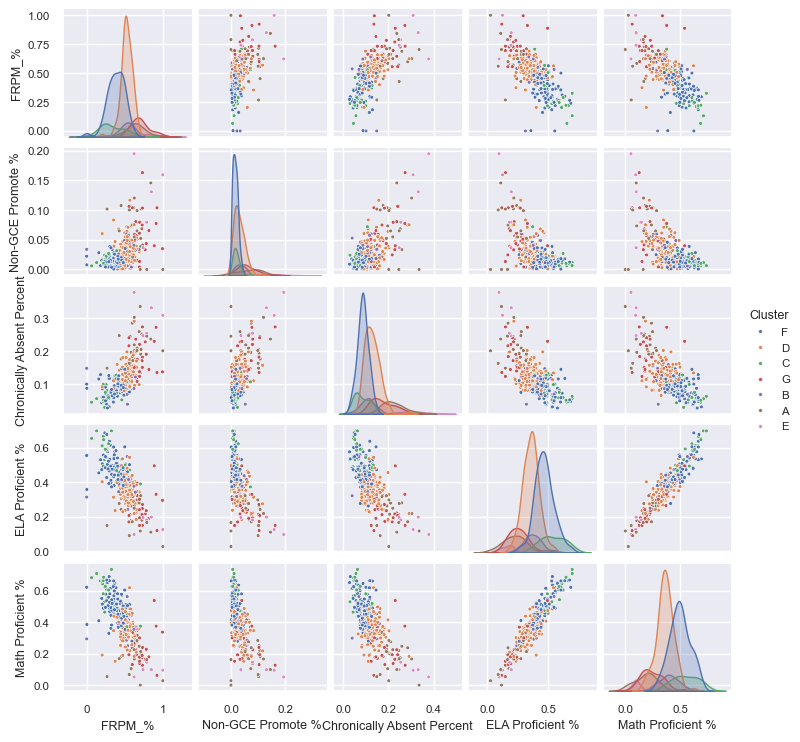

In [37]:
sns.set_theme(font_scale=0.75)
sns.pairplot(df, hue='Cluster', vars=["FRPM_%", "Non-GCE Promote %", "Chronically Absent Percent", "ELA Proficient %", "Math Proficient %"], height=1.5, markers='.', plot_kws={'s': 30}) 
plt.show()

C:\Users\lehma\AppData\Local\Temp\ipykernel_5964\2987112802.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\lehma\AppData\Local\Temp\ipykernel_5964\2987112802.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


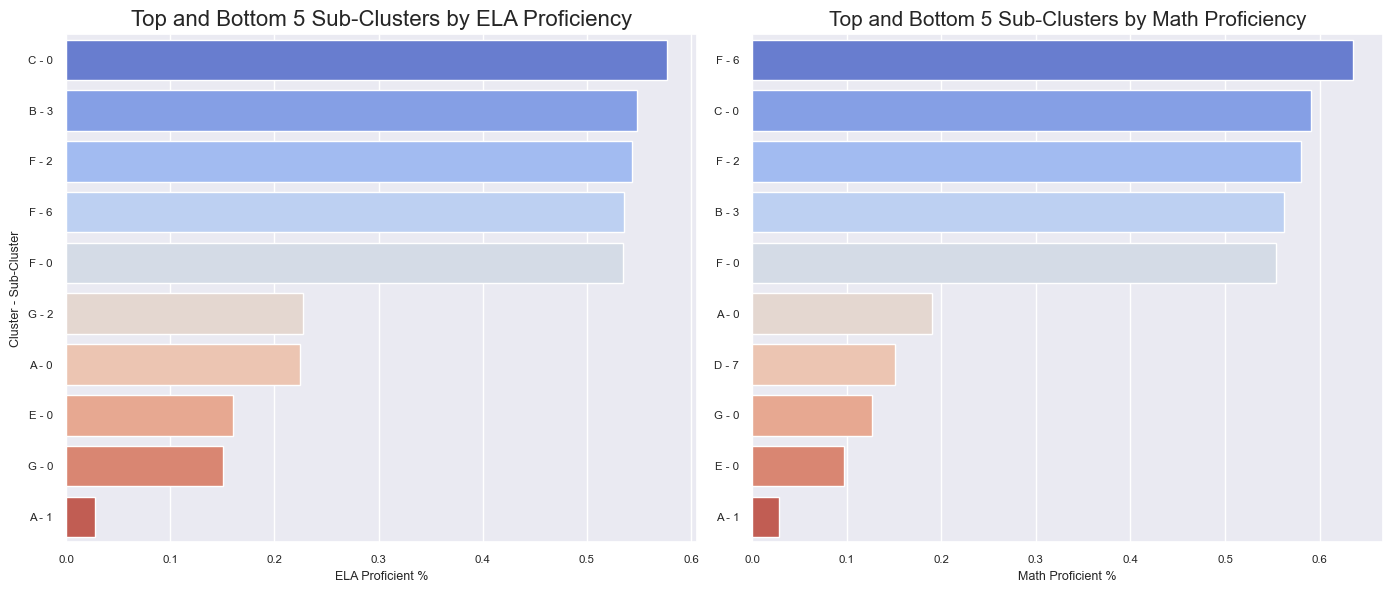

In [50]:
df['cluster_label'] = df['Cluster'].astype(str) + ' - ' + df['sub_cluster'].astype(str)

subcluster_avg = (
    df.groupby('cluster_label')[['ELA Proficient %', 'Math Proficient %']]
    .mean()
    .reset_index()
)

top5_ela = subcluster_avg.sort_values('ELA Proficient %', ascending=False).head(5)
bottom5_ela = subcluster_avg.sort_values('ELA Proficient %').head(5).iloc[::-1]
top5_math = subcluster_avg.sort_values('Math Proficient %', ascending=False).head(5)
bottom5_math = subcluster_avg.sort_values('Math Proficient %').head(5).iloc[::-1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ELA Chart
ela_data = pd.concat([top5_ela, bottom5_ela])
sns.barplot(
    data=ela_data,
    y='cluster_label',
    x='ELA Proficient %',
    orient='h',
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Top and Bottom 5 Sub-Clusters by ELA Proficiency', fontsize=16)
axes[0].set_xlabel('ELA Proficient %')
axes[0].set_ylabel('Cluster - Sub-Cluster')

# Math Chart
math_data = pd.concat([top5_math, bottom5_math])
sns.barplot(
    data=math_data,
    y='cluster_label',
    x='Math Proficient %',
    orient='h',
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Top and Bottom 5 Sub-Clusters by Math Proficiency',fontsize=15)
axes[1].set_xlabel('Math Proficient %')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

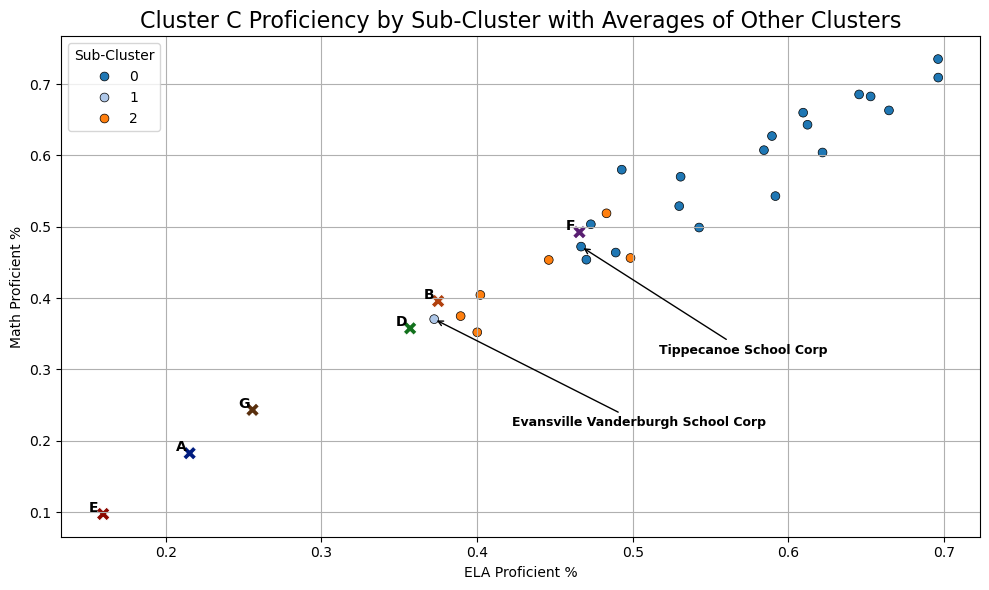

In [33]:
cluster_c = df[df['Cluster'] == 'C']

other_clusters_avg = (
    df[df['Cluster'] != 'C']
    .groupby('Cluster')[['ELA Proficient %', 'Math Proficient %']]
    .mean()
    .reset_index()
)

cluster_c_prof = plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=cluster_c,
    x='ELA Proficient %',
    y='Math Proficient %',
    hue='sub_cluster',
    palette='tab20',
    s=40,
    alpha=1,
    edgecolor='black',
    linewidth=0.5
)

sns.scatterplot(
    data=other_clusters_avg,
    x='ELA Proficient %',
    y='Math Proficient %',
    hue='Cluster',
    marker='X',
    s=100,
    legend=False,
    palette='dark'
)

for _, row in other_clusters_avg.iterrows():
    plt.text(
        row['ELA Proficient %'] - 0.009,
        row['Math Proficient %'] + 0.003,
        row['Cluster'],
        fontsize=10,
        weight='bold',
        color='black'
    )
    
highlight_names = [
    "Evansville Vanderburgh School Corp",
    "Tippecanoe Valley School Corp"
]

schools_to_label = [
    "Evansville Vanderburgh School Corp",
    "Tippecanoe School Corp"
]

for _, row in cluster_c[cluster_c['Corp Name'].isin(schools_to_label)].iterrows():
    plt.annotate(
        row['Corp Name'], 
        xy=(row['ELA Proficient %'], row['Math Proficient %']), 
        xytext=(row['ELA Proficient %'] + 0.05, row['Math Proficient %'] - 0.15), 
        arrowprops=dict(arrowstyle='->', color='black', lw=1),
        fontsize=9,
        color='black',
        weight='bold'
    )

plt.title('Cluster C Proficiency by Sub-Cluster with Averages of Other Clusters', fontsize=16)
plt.xlabel('ELA Proficient %')
plt.ylabel('Math Proficient %')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sub-Cluster')
plt.show()

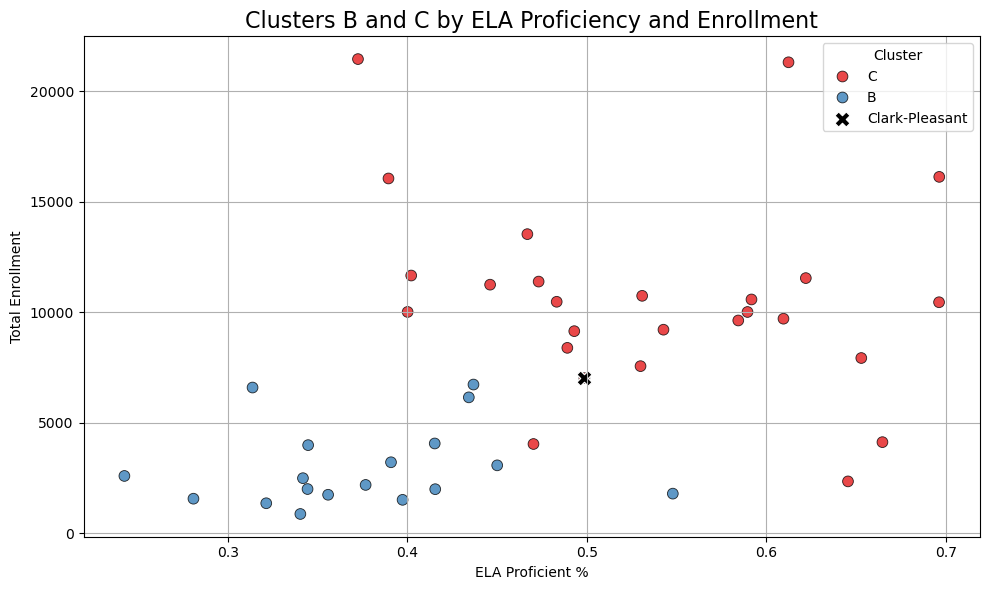

In [26]:
clusters_cb = df[df['Cluster'].isin(['C', 'B'])]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clusters_cb,
    x='ELA Proficient %',
    y='Total Enrollment',
    hue='Cluster',
    palette='Set1',
    s=60,
    edgecolor='black',
    alpha=0.8
)

highlight_school = df[df['Corp Name'] == 'Clark-Pleasant Community Sch Corp']
sns.scatterplot(
    data=highlight_school,
    x='ELA Proficient %',
    y='Total Enrollment',
    color='black',
    marker='X',
    s=120,
    label='Clark-Pleasant'
)

plt.title('Clusters B and C by ELA Proficiency and Enrollment', fontsize=16)
plt.xlabel('ELA Proficient %')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()